In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss
from sklearn.model_selection import train_test_split,StratifiedKFold , GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer ,make_column_selector
from sklearn.pipeline import Pipeline


In [2]:
satellite = pd.read_csv('Satellite.csv',sep=';')

In [3]:
X = satellite.drop('classes',axis=1)
y = satellite['classes']

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=24,test_size=0.3)

In [5]:
# svm = SVC(kernel='rbf',probability=True,random_state=24)

dtc = DecisionTreeClassifier(random_state=24,max_depth=3)

params = {'min_samples_split':[2,10,25,10],
         'min_samples_leaf':[1,10,25,50],
         'max_depth':[None,4,6]}
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss',verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.349 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-4.817 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.573 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.265 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.293 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-3.915 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-3.512 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-4.375 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-4.050 total time=   0.0s
[CV 5/5

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 10]},
             scoring='neg_log_loss', verbose=3)

In [6]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2}
-0.6679631827034694


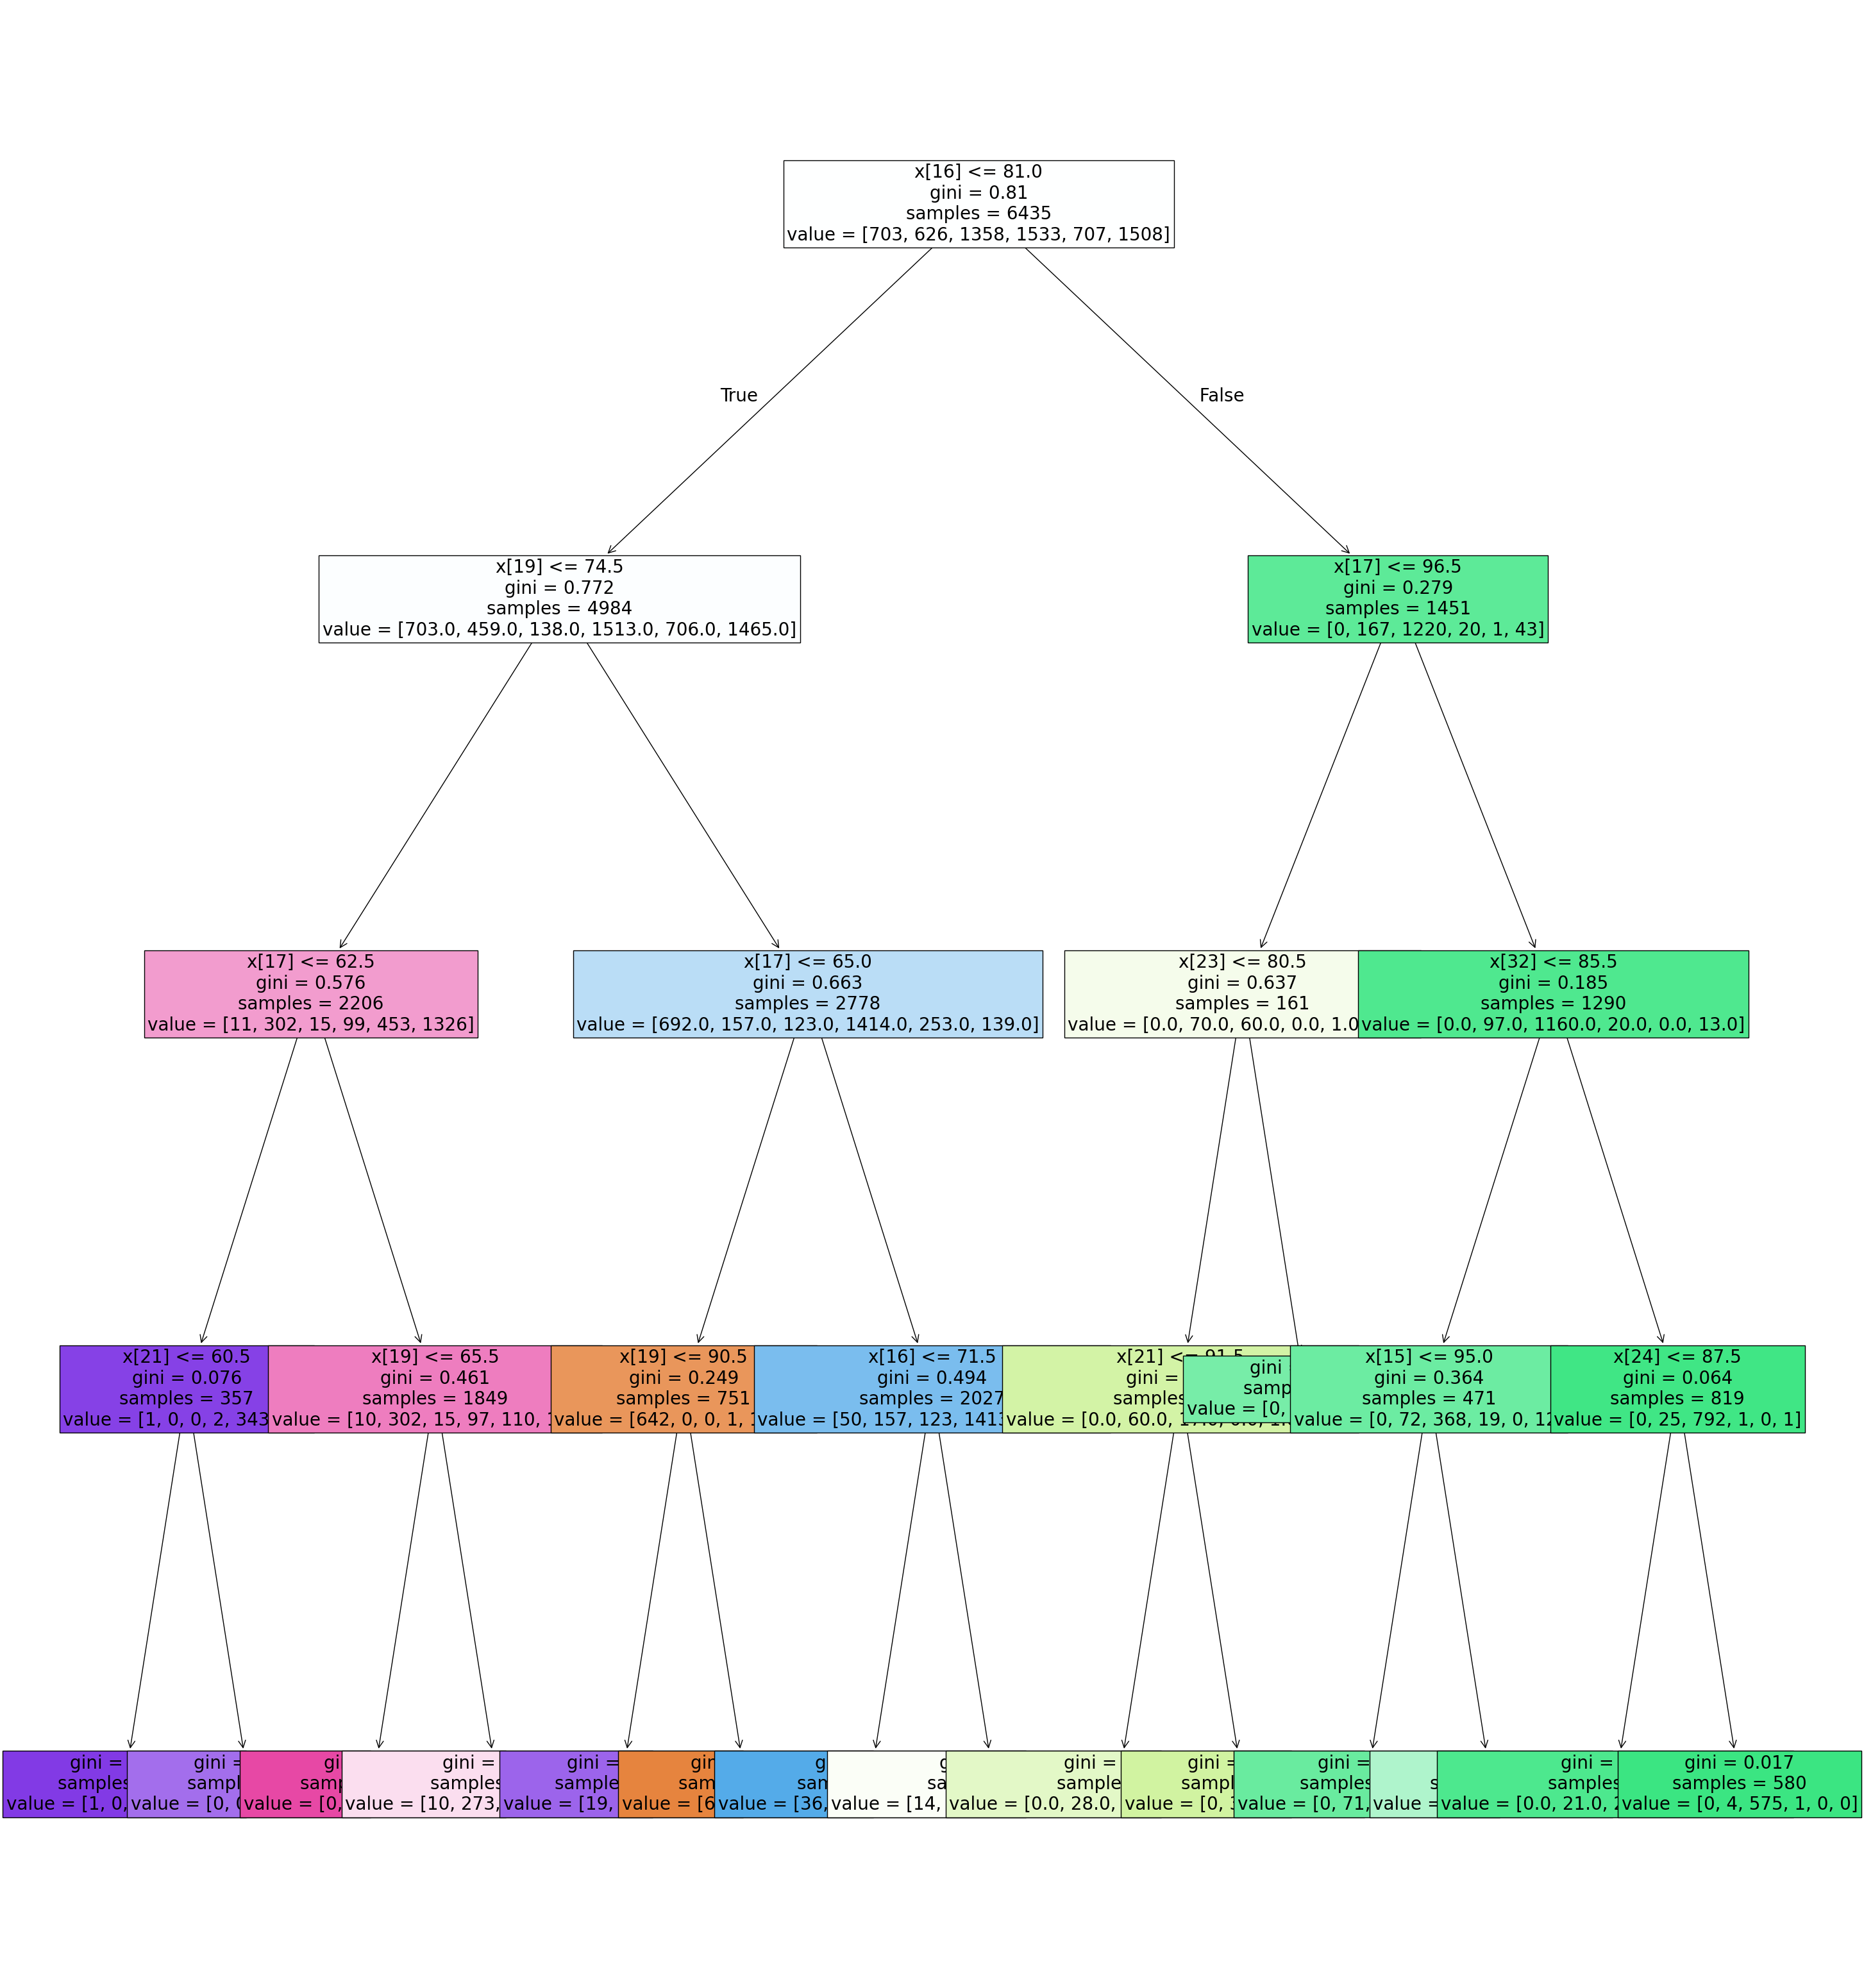

In [7]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(35,40))
plot_tree(best_tree,filled=True,fontsize=20)
plt.show()

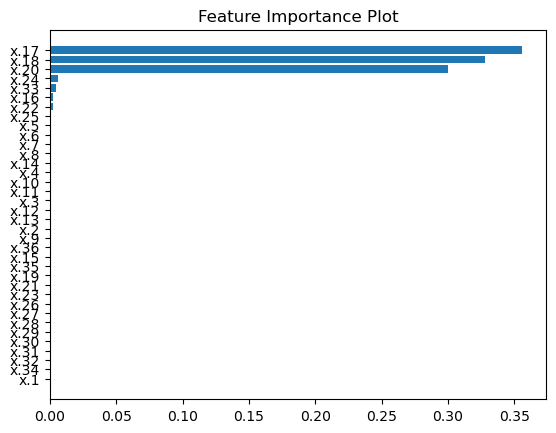

In [8]:
df_imp = pd.DataFrame({'feature':list(X.columns),'importance':best_tree.feature_importances_})
df_imp.sort_values('importance',inplace=True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title('Feature Importance Plot')
plt.show()